In [23]:
import pandas as pd
df1 = pd.read_csv('sample_submission.csv')
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')
print('one:')
print(df1.head())
print('test:')
print(df_test.head())
print('train:')
print(df_train.head())

# print('one:')
# print(df1.info())
# print('test:')
# print(df_test.info())
# print('train:')
# print(df_train.info())

one:
       id  Exited
0  165034     0.5
1  165035     0.5
2  165036     0.5
3  165037     0.5
4  165038     0.5
test:
       id  CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0  165034    15773898   Lucchese          586    France  Female  23.0       2   
1  165035    15782418       Nott          683    France  Female  46.0       2   
2  165036    15807120         K?          656    France  Female  34.0       7   
3  165037    15808905  O'Donnell          681    France    Male  36.0       8   
4  165038    15607314    Higgins          752   Germany    Male  38.0      10   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0       0.00              2        0.0             1.0        160976.75  
1       0.00              1        1.0             0.0         72549.27  
2       0.00              2        1.0             0.0        138882.09  
3       0.00              1        1.0             0.0        113931.57  
4  121263.62            

In [37]:
#上傳檔案

import pandas as pd
from sklearn.preprocessing import LabelEncoder
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
df1 = pd.read_csv('sample_submission.csv')
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

le = LabelEncoder()

for features in ['Geography', 'Gender','Surname']:
    df_train[features + 'Label'] = le.fit_transform(df_train[features])
    df_train[features + 'Inverse']=le.inverse_transform(df_train[features + 'Label'])
    df_test[features + 'Label'] = le.fit_transform(df_test[features])
    df_test[features + 'Inverse']=le.inverse_transform(df_test[features + 'Label'])
    
# print(df_train.head())

# df_train_gender = df_train['Gender'].value_counts()
# bins = [0,18,30,50,100]
# labels = ['0-17','18-29','30-49','50+']
# df_train['AgeGroup'] = pd.cut(df_train['Age'],bins=bins,labels=labels,right='Fales')


feature = df_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','GeographyLabel','GenderLabel','SurnameLabel']]
label = df_train['Exited']

x = pd.get_dummies(feature)
y = label
X_test_final = pd.get_dummies(df_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','GeographyLabel','GenderLabel','SurnameLabel']])
X_test_final = X_test_final.fillna(X_test_final.mean())
model = LogisticRegression(max_iter=500)
model.fit(x, y)

predictions = model.predict(X_test_final)

output = pd.DataFrame({'id': df_test['id'], 'Exited': predictions})
print(output)
output.to_csv('submission_bank.csv', index=False)
print("Your submission was successfully saved!")

            id  Exited
0       165034       0
1       165035       0
2       165036       0
3       165037       0
4       165038       0
...        ...     ...
110018  275052       0
110019  275053       0
110020  275054       0
110021  275055       0
110022  275056       0

[110023 rows x 2 columns]
Your submission was successfully saved!


In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

# df1 = pd.read_csv('sample_submission.csv')
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

le = LabelEncoder()

for features in ['Geography', 'Gender','Surname']:
    df_train[features + 'Label'] = le.fit_transform(df_train[features])
    df_train[features + 'Inverse']=le.inverse_transform(df_train[features + 'Label'])
    df_test[features + 'Label'] = le.fit_transform(df_test[features])
    df_test[features + 'Inverse']=le.inverse_transform(df_test[features + 'Label'])
# print(df_train.head())

feature = df_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','GeographyLabel','GenderLabel']]
label = df_train['Exited']

x_train,x_test,y_train,y_test = train_test_split(feature,label,test_size=0.3,random_state=0)

model = LogisticRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)#####為什麼這裡不是放入df_test而是split後的x_test 因為我看titanic決策數時他會把text的檔案也引入 但決策樹跟邏輯斯特差別在於它沒有split

accuracy = accuracy_score(y_test,y_pred)
classification_rep = classification_report(y_test,y_pred)

print(accuracy)
print(classification_rep)

#####此題要看的是精確率對嗎？ 是預測裡面真的離開的人有多少
#####上課教的只是把train檔案套進去 並沒有教把test的檔案引入
#####何時才會把test檔案帶入和train比較
#####即使把所有資料都輸入混淆矩陣也都出來 我的預測是精確率重要此時Logestic regression要調整哪裡的參數？？
#####此時下面的 precision    recall  f1-score   support 跟我在去做混淆矩陣模型的差別是什麼??因為等同於我做了兩次混淆矩陣兩者算的會有不同嗎？？


0.7865120882228192
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     39046
           1       0.48      0.12      0.19     10465

    accuracy                           0.79     49511
   macro avg       0.64      0.54      0.53     49511
weighted avg       0.73      0.79      0.73     49511



In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
df1 = pd.read_csv('sample_submission.csv')
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

le = LabelEncoder()

for features in ['Geography', 'Gender']:
    df_train[features + 'Label'] = le.fit_transform(df_train[features])
    df_train[features + 'Inverse']=le.inverse_transform(df_train[features + 'Label'])
    df_test[features + 'Label'] = le.fit_transform(df_test[features])
    df_test[features + 'Inverse']=le.inverse_transform(df_test[features + 'Label'])
# print(df_train.head())

df_train_gender = df_train['Gender'].value_counts()
bins = [0,18,30,50,100]
labels = ['0-17','18-29','30-49','50+']
df_train['AgeGroup'] = pd.cut(df_train['Age'],bins=bins,labels=labels,right='Fales')

feature = df_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','GeographyLabel','GenderLabel']]
label = df_train['Exited']

x_train,x_test,y_train,y_test = train_test_split(feature,label,test_size=0.3,random_state=0)

model = LogisticRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)#####為什麼這裡不是放入df_test而是split後的x_test 因為我看titanic決策數時他會把text的檔案也引入 但決策樹跟邏輯斯特差別在於它沒有split

accuracy = accuracy_score(y_test,y_pred)
classification_rep = classification_report(y_test,y_pred)

print(accuracy)
print(classification_rep)



0.7865120882228192
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     39046
           1       0.48      0.12      0.19     10465

    accuracy                           0.79     49511
   macro avg       0.64      0.54      0.53     49511
weighted avg       0.73      0.79      0.73     49511



In [34]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# df1 = pd.read_csv('sample_submission.csv')
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

le = LabelEncoder()

for features in ['Geography', 'Gender']:
    df_train[features + 'Label'] = le.fit_transform(df_train[features])
    df_train[features + 'Inverse']=le.inverse_transform(df_train[features + 'Label'])
    df_test[features + 'Label'] = le.fit_transform(df_test[features])
    df_test[features + 'Inverse']=le.inverse_transform(df_test[features + 'Label'])
# print(df_train.head())

feature = df_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','GeographyLabel','GenderLabel']]
label = df_train['Exited']

# x_train,x_test,y_train,y_test = train_test_split(feature,label,test_size=0.3,random_state=0)

model = LogisticRegression()

model.fit(feature,label)

y_pred = model.predict(feature) #####為什麼這裡不是放入df_test而是split後的x_test 因為我看titanic決策數時他會把text的檔案也引入 但決策樹跟邏輯斯特差別在於它沒有split

confusion_matrix = confusion_matrix(label,y_pred)

print(confusion_matrix)
#-------------------------------------------

accuracy = accuracy_score(label,y_pred)
precision = precision_score(label,y_pred)
recall = recall_score(label,y_pred)
f1 = f1_score(label,y_pred)
# accuracy_score,precision_score,recall_score,f1_score
print(accuracy)
print(precision)
print(recall)
print(f1)

#####如果我現在知道這個資料是準確的 那我是不是把text的檔案裡放入我想預測的客戶資料他就會跟我說這個客戶會不會流失 是這個意思嗎？？

[[125458   4655]
 [ 30723   4198]]
0.7856320515772508
0.4741895402688354
0.12021419776065978
0.1918033535888884


In [1]:
import pandas as pd
df1 = pd.read_csv('sample_submission.csv')
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')
print('one:')
print(df1.head())
print('test:')
print(df_test.head())
print('train:')
print(df_train.head())
import matplotlib.pyplot as plt
df_train_gender = df_train['Gender'].value_counts()
bins = [0,18,30,50,100]
labels = ['0-17','18-29','30-49','50+']
df_train['AgeGroup'] = pd.cut(df_train['Age'],bins=bins,labels=labels,right='Fales')
gender_age_group = df_train.groupby(['Gender','AgeGroup'])['Exited'].mean()
gender_age_group.plot.bar()
plt.show()   #超過50歲的不論男性女性都師率都比較高



one:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      110023 non-null  int64  
 1   Exited  110023 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.7 MB
None


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


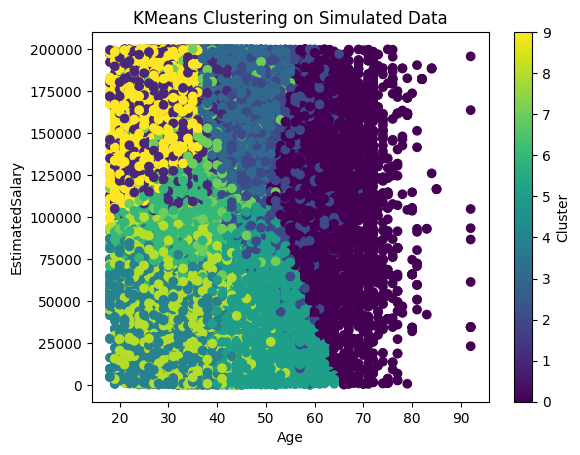

In [76]:
#kmeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df_train = pd.read_csv('train.csv')

features = ['Age', 'EstimatedSalary','CreditScore']
X = df_train[features]

df_train_gender = df_train['Gender'].value_counts()
bins = [0,18,30,50,100]
labels = ['0-17','18-29','30-49','50+']
df_train['AgeGroup'] = pd.cut(df_train['Age'],bins=bins,labels=labels,right='Fales')

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 应用KMeans聚类
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_scaled)

# 将聚类标签添加到原DataFrame中
df_train['Cluster'] = kmeans.labels_

# 可视化聚类结果（以Age和EstimatedSalary为例）
plt.scatter(df_train['Age'], df_train['EstimatedSalary'], c=df_train['Cluster'], cmap='viridis')
plt.title('KMeans Clustering on Simulated Data')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
#####為何兩者算出來的準確率會有誤差
LogisticRegression:
0.7865120882228192
              precision    recall  f1-score   support
           0       0.80      0.97      0.88     39046
           1       0.48      0.12      0.19     10465

    accuracy                           0.79     49511
   macro avg       0.64      0.54      0.53     49511
weighted avg       0.73      0.79      0.73     49511

confusion_matrix:
[[125458   4655]
 [ 30723   4198]]
0.7856320515772508
0.4741895402688354
0.12021419776065978
0.1918033535888884